In [2]:
#https://stackoverflow.com/a/24456404
import datetime
import os

from awpy import Demo
from awpy.stats import adr
from awpy.stats import kast
from awpy.stats import rating
from awpy.plot import plot, PLOT_SETTINGS


steam_id="76561198013243326"
dem = Demo(r"C:\Users\laura\Downloads\natus-vincere-vs-virtus-pro-m1-overpass.dem", ticks=True)
#dem = Demo(r"C:\Users\laura\Downloads\natus-vincere-vs-virtus-pro-m2-anubis.dem", ticks=True)






#print(dem.damages[dem.damages['attacker_steamid'] == steam_id]['dmg_health_real'].sum())



c:\dissertation\cs2stats\venv\Lib\site-packages\awpy\parsers\ticks.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parsed_df[col] = parsed_df[col].fillna(value=False)
c:\dissertation\cs2stats\venv\Lib\site-packages\awpy\parsers\ticks.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parsed_df[col] = parsed_df[col].fillna(value=False)
c:\dissertation\cs2stats\venv\Lib\site-packages\awpy\parsers\ticks.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [24]:

dem.weapon_fires[['player_zoom_lvl','player_accuracy_penalty']].head(n=5)
len(dem.weapon_fires)
dem.grenades['grenade_type'].unique()

dem.weapon_fires[['player_steamid','player_name','tick','player_X','player_Y','player_Z','player_yaw','weapon','player_zoom_lvl','player_accuracy_penalty']].iloc[0].to_dict()

dem.ticks[dem.ticks['tick'] == (dem.ticks.iloc[0]['tick'])][['tick', 'steamid', 'name', 'team_name', 'team_clan_name']]

,tick,steamid,name,team_name,team_clan_name
486359,81310,76561199063068840,w0nderful,CT,NAVI-
486360,81310,76561198080114546,fame,TERRORIST,Virtus.proVP
486361,81310,76561198176878303,jL.,CT,NAVI-
486362,81310,76561198246607476,b1t,CT,NAVI-
486363,81310,76561198050250233,iM,CT,NAVI-
486364,81310,76561198222442504,Hop6epT,TERRORIST,Virtus.proVP
486365,81310,76561198000827804,mir1,TERRORIST,Virtus.proVP
486366,81310,76561198036125584,JAMEZWER,TERRORIST,Virtus.proVP
486367,81310,76561197995817501,FL1TJO,TERRORIST,Virtus.proVP
486368,81310,76561198013243326,AleksibOb,CT,NAVI-


In [70]:


#every 12th tick (assuming 64 tick rate)
roundTicks = dem.ticks[dem.ticks['round']==1].sort_values(by=['tick'])
players = roundTicks['steamid'].unique()

startTick = roundTicks.head(1)['tick'].values[0]
endTick = roundTicks.tail(1)['tick'].values[0]
ticks = list(range(startTick,endTick,12))#get every 12th tick only
roundTicks = roundTicks[roundTicks['tick'].isin(ticks)]
playerPos=[]

for tick in ticks:
    roundTick = roundTicks[roundTicks['tick']==tick][['steamid','name','X','Y', 'health', 'armor_value', 'yaw', 'inventory']]
    t=[]
    for i in roundTick.index:
        t.append(roundTick.loc[i].to_dict())

    playerPos.append(t)

print(playerPos[0][0])



{'steamid': '76561199063068840', 'name': 'w0nderful', 'X': -2084.0, 'Y': 862.0, 'health': 100.0, 'armor_value': 100.0, 'yaw': -171.33453369140625, 'inventory': ['knife_butterfly', 'USP-S']}


In [87]:
import json

j = {"playerPositions": playerPos}
j
playerPos[10][0]['X']

dem.ticks['X'].min()
dem.ticks['X'].max()
dem.ticks['Y'].min()
dem.ticks['Y'].max()

#X -3959.9727 - -99.10431
#Y -3474.6633 - 1624.767

1624.767

In [17]:
##work out the tick rate

t=dem.ticks[['game_time', 'tick']].sample(n=2)
tickDiff = t.iloc[1]['tick']-t.iloc[0]['tick']
timeDiff = t.iloc[1]['game_time']-t.iloc[0]['game_time']
print(tickDiff)
print(timeDiff)
round(tickDiff/timeDiff)

-53844.0
-841.3125


64

(<Figure size 1024x1024 with 1 Axes>, <Axes: >)

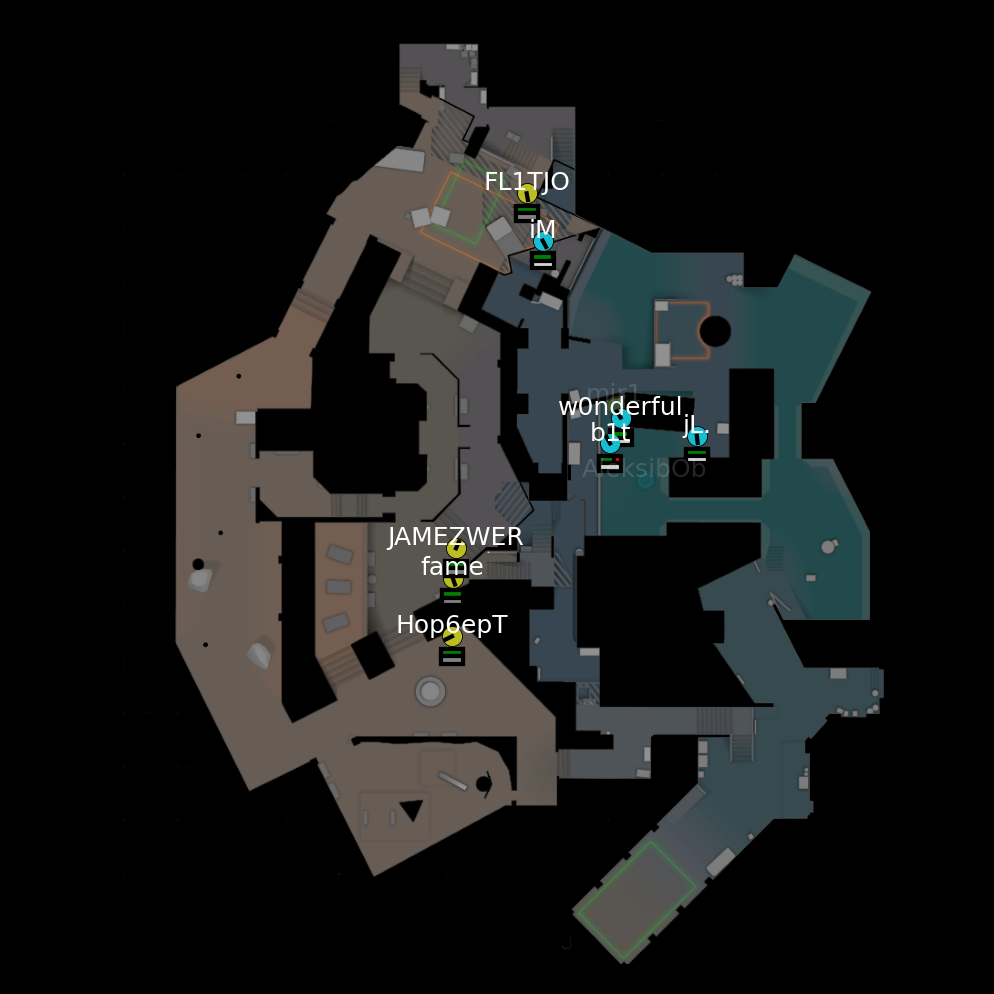

In [8]:
frame_df = dem.ticks[dem.ticks["tick"] == dem.ticks.tick.unique()[10500]]
frame_df = frame_df[
    ["X", "Y", "Z", "health", "armor_value", "pitch", "yaw", "team_name", "name"]
]

points = []
point_settings = []

for _, row in frame_df.iterrows():
    points.append((row["X"], row["Y"], row["Z"]))

    # Determine team and corresponding settings
    team = "ct" if row["team_name"] == "CT" else "t"
    settings = PLOT_SETTINGS[team].copy()

    # Add additional settings
    settings.update(
        {
            "size":4,
            "hp": row["health"],
            "armor": row["armor_value"],
            "direction": (row["pitch"], row["yaw"]),
            "label": row["name"],
        }
    )

    point_settings.append(settings)

plot("de_overpass", points, point_settings)

In [8]:
#dem.kills[dem.kills['attacker_steamid'] == steam_id]
imTicks = dem.ticks[dem.ticks['round'] == 1]
imTicks = imTicks[imTicks['name']=='iM']
print(len(imTicks))
imTicks[['X','Y','Z']]


7018


,X,Y,Z
486363,-2164.000000,900.000000,484.031281
486373,-2164.258545,899.785767,484.031281
486383,-2164.697266,899.421814,484.031281
486393,-2165.316406,898.907898,484.031281
486403,-2166.115234,898.243652,484.031281
...,...,...,...
556493,-1804.803223,607.116272,260.031250
556503,-1804.803223,607.116272,260.031250
556513,-1804.803223,607.116272,260.031250
556523,-1804.803223,607.116272,260.031250


In [73]:
len(dem.ticks)
len(dem.grenades)
len(dem.smokes)
dem.kills.head(n=50)[['tick', 'dmg_health', 'dmg_armor', 'headshot', 'hitgroup', 'round', 'attacker_name', 'weapon']]
dem.ticks.head(n=50)
dem.events['round_announce_match_start']
dem.events['round_announce_last_round_half']

dem.events['round_announce_last_round_half']


,ct_team_clan_name,ct_team_name,game_phase,game_time,is_bomb_planted,is_ct_timeout,is_freeze_period,is_match_started,is_technical_timeout,is_terrorist_timeout,is_waiting_for_resume,is_warmup_period,t_team_clan_name,t_team_name,tick,round
0,NAVI-,CT,2,2856.718750,False,False,False,True,False,False,False,False,Virtus.proVP,TERRORIST,182682,11
1,Virtus.proVP,CT,2,4948.765625,True,False,False,True,False,False,False,False,NAVI-,TERRORIST,316573,26
2,NAVI-,CT,2,5902.250000,False,False,False,True,False,False,False,False,Virtus.proVP,TERRORIST,377596,32


In [97]:
ctTeam = "NAVI"
tTeam = "VP"

for index, round in dem.rounds.iterrows():
    print(round['round'])
    print(round['round']-1)


    if (round['round']-1) in dem.events['round_announce_last_round_half']['round'].tolist():
        print("swapping sides")

        tmpCtTeam = ctTeam
        ctTeam = tTeam
        tTeam = tmpCtTeam


    if (round['winner'] == "CT") or (round['winner'] == 3):
        winner = ctTeam
    else:
        winner = tTeam

    print(round['winner'])
    print(winner)
    print("=============")

1
0
2
VP
2
1
2
VP
3
2
2
VP
4
3
2
VP
5
4
2
VP
6
5
2
VP
7
6
3
NAVI
8
7
2
VP
9
8
2
VP
10
9
2
VP
11
10
3
NAVI
12
11
swapping sides
3
VP
13
12
2
NAVI
14
13
2
NAVI
15
14
2
NAVI
16
15
2
NAVI
17
16
2
NAVI
18
17
3
VP
19
18
2
NAVI
20
19
2
NAVI
21
20
2
NAVI
22
21
3
VP
23
22
3
VP
24
23
2
NAVI
25
24
2
NAVI
26
25
2
NAVI
27
26
swapping sides
3
NAVI
28
27
2
VP
29
28
2
VP
30
29
3
NAVI
31
30
2
VP
32
31
3
NAVI
33
32
swapping sides
3
VP
34
33
2
NAVI
35
34
2
NAVI


: 

In [9]:
from awpy.plot import gif, PLOT_SETTINGS
from tqdm import tqdm

frames = []

for tick in tqdm(dem.ticks[dem.ticks["round"] == 3].tick.values[::128]):
    frame_df = dem.ticks[dem.ticks["tick"] == tick]
    frame_df = frame_df[
        ["X", "Y", "Z", "health", "armor_value", "pitch", "yaw", "team_name", "name"]
    ]

    points = []
    point_settings = []

    for _, row in frame_df.iterrows():
        points.append((row["X"], row["Y"], row["Z"]))

        # Determine team and corresponding settings
        team = "ct" if row["team_name"] == "CT" else "t"
        settings = PLOT_SETTINGS[team].copy()

        # Add additional settings
        settings.update(
            {
                "hp": row["health"],
                "armor": row["armor_value"],
                "direction": (row["pitch"], row["yaw"]),
                "label": row["name"],
            }
        )

        point_settings.append(settings)

    frames.append({"points": points, "point_settings": point_settings})

print("Finished processing frames. Creating gif...")
gif("de_overpass", frames, "de_dust2.gif", duration=100)

100%|██████████| 549/549 [00:01<00:00, 388.65it/s]


Finished processing frames. Creating gif...


100%|██████████| 549/549 [02:39<00:00,  3.43it/s]
